In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings(action= 'ignore')

### Import the dataset

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.shape

(891, 12)

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Miss. Margaret Edith",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### In the above analysis it is seen that 'cabin' feature has 687 missing values out of 891 ie 77%, hence it is better to drop this feature.

In [7]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
dataset.drop(columns = ['Cabin'], inplace= True)

In [9]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


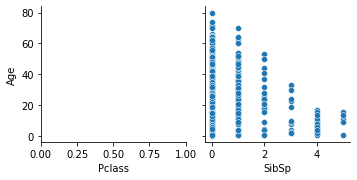

In [11]:
sns.pairplot( dataset, y_vars = ['Age'], x_vars= ['Pclass', 'SibSp'] )

In [12]:
dataset.groupby('SibSp')['Age'].median()

SibSp
0    29.0
1    30.0
2    23.0
3     9.5
4     6.5
5    11.0
8     NaN
Name: Age, dtype: float64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

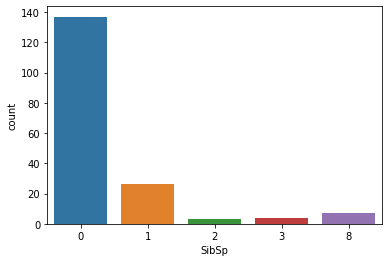

In [13]:
sns.countplot(x= 'SibSp', data = dataset[dataset['Age'].isnull()])

In [14]:
dataset['Age'].median()

28.0

In [15]:
dataset['Age'] = np.where((dataset['SibSp']==8)&(dataset['Age'].isnull()), 28, dataset['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

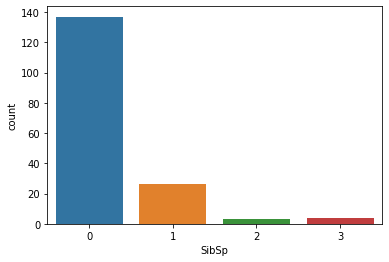

In [16]:
sns.countplot(x= 'SibSp', data = dataset[dataset['Age'].isnull()])

In [17]:
dataset['Age'] = np.where((dataset['SibSp']==0)&(dataset['Age'].isnull()), 29, dataset['Age'])
dataset['Age'] = np.where((dataset['SibSp']==1)&(dataset['Age'].isnull()), 30, dataset['Age'])
dataset['Age'] = np.where((dataset['SibSp']==2)&(dataset['Age'].isnull()), 23, dataset['Age'])
dataset['Age'] = np.where((dataset['SibSp']==3)&(dataset['Age'].isnull()), 9.5, dataset['Age'])

In [18]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [19]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
dataset['Embarked'].fillna('S', inplace =True)

In [21]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Checking and removing outliers

<AxesSubplot:xlabel='Fare'>

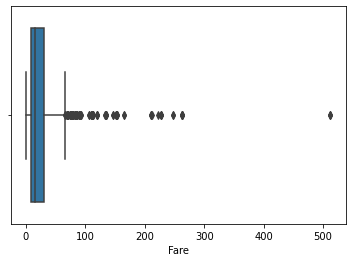

In [22]:
sns.boxplot(dataset['Fare'])

In [23]:
dataset[dataset['Fare']> 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [24]:
dataset.drop(index=[258,679,737], inplace =True)

<AxesSubplot:xlabel='Fare'>

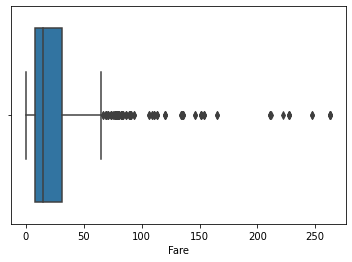

In [25]:
sns.boxplot(dataset['Fare'])

<AxesSubplot:xlabel='Age'>

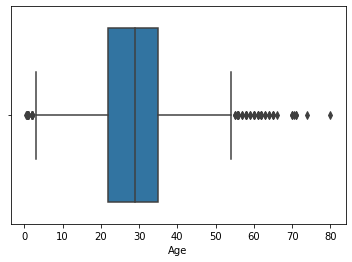

In [26]:
sns.boxplot(dataset['Age'])

### Since we have removed all the Null values and Outliers. the visual predictions can be made

<AxesSubplot:xlabel='Sex', ylabel='count'>

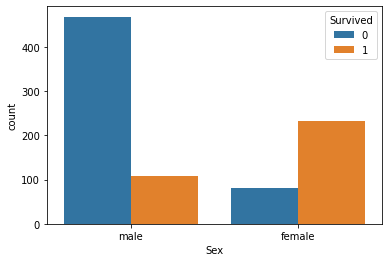

In [27]:
sns.countplot(x= 'Sex', hue = 'Survived', data =dataset )

In [28]:
pd.crosstab(columns= dataset['Sex'], index =dataset['Survived'])

Sex,female,male
Survived,,
0,81,468
1,232,107


In [29]:
print('% of Female survived =',(232/(232+81))*100)
print('% of male survived =',(107/(468+107))*100)

% of Female survived = 74.12140575079871
% of male survived = 18.608695652173914


### From the above graph it is clear that female passengers have more survival rate as compared to male passengers

<AxesSubplot:xlabel='Pclass', ylabel='count'>

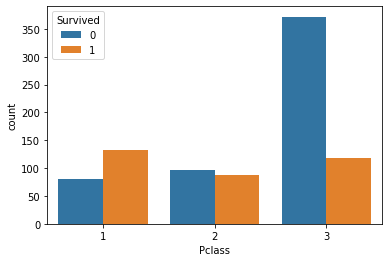

In [30]:
sns.countplot(x= 'Pclass', hue = 'Survived', data =dataset )

In [31]:
pd.crosstab(columns= dataset['Pclass'], index =dataset['Survived'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,133,87,119


In [32]:
print('% of 1st class survived =',(133/(133+80))*100)
print('% of 2nd class survived =',(87/(97+87))*100)
print('% of 3rd class survived =',(119/(119+372))*100)

% of 1st class survived = 62.441314553990615
% of 2nd class survived = 47.28260869565217
% of 3rd class survived = 24.236252545824847


### From the above graph it is clear that 1st class passengers have more survival rate as compared to 2nd and 3rd class passengers

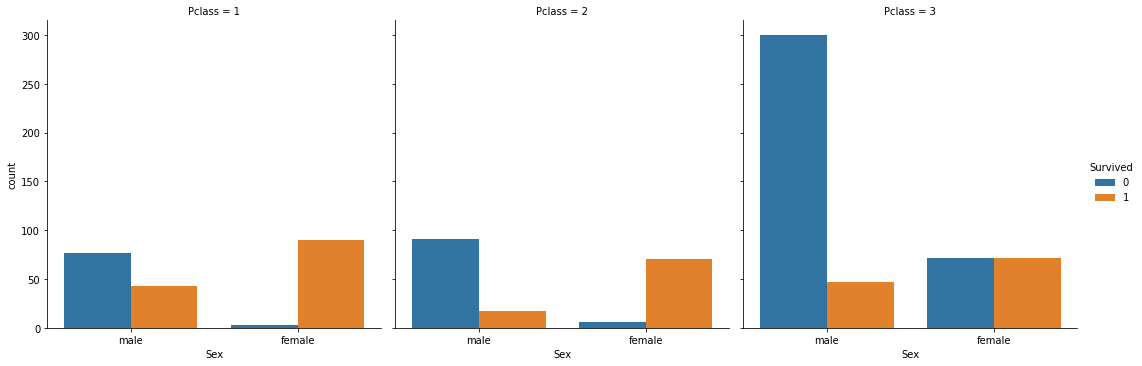

In [33]:
sns.catplot('Sex', col ='Pclass', hue= 'Survived', data = dataset, kind = 'count')

<AxesSubplot:xlabel='Agecat', ylabel='count'>

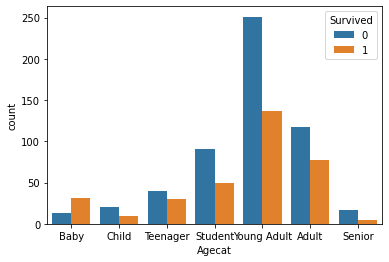

In [34]:
bins = [0,5,12,18,24,35,60,np.inf]
labels =[ 'Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
dataset['Agecat']= pd.cut(dataset['Age'], bins, labels = labels)
sns.countplot(x= 'Agecat', hue = 'Survived', data =dataset )


In [35]:
pd.crosstab(columns= dataset['Agecat'], index =dataset['Survived'])

Agecat,Baby,Child,Teenager,Student,Young Adult,Adult,Senior
Survived,,,,,,,
0,13,20,40,91,251,117,17
1,31,9,30,50,137,77,5


In [36]:
print('% of babies survived =',(31/(13+31))*100)
print('% of children survived =',(9/(9+20))*100)
print('% of teenagers survived =',(30/(30+40))*100)
print('% of students survived =',(50/(50+91))*100)
print('% of Young Adults survived =',(137/(137+251))*100)
print('% of Adults survived =',(77/(77+117))*100)
print('% of Senior citizens survived =',(5/(5+17))*100)

% of babies survived = 70.45454545454545
% of children survived = 31.03448275862069
% of teenagers survived = 42.857142857142854
% of students survived = 35.46099290780142
% of Young Adults survived = 35.30927835051546
% of Adults survived = 39.69072164948454
% of Senior citizens survived = 22.727272727272727


### From the above data is clear that babies, teenagers and adults have the maximum survival rate while senior citizens have the lowest survival rate

# Using the Model for prediction (Here we have compared Logistic Regression and Random Forest ensemble model)

In [37]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agecat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult


In [38]:
dataset.drop(columns=['PassengerId','Name','Ticket','Agecat'], inplace=True)

In [39]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [40]:
numerical_df = dataset.select_dtypes(include = [np.number]).copy()

In [41]:
numerical_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [42]:
char_df = dataset.select_dtypes(include = 'object').copy()

In [43]:
char_df.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [44]:
dummies_df = pd.get_dummies(char_df)

In [45]:
dummies_df.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [46]:
comb_dataset = pd.concat([dummies_df ,numerical_df], axis=1)

In [47]:
comb_dataset.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,3,22.0,1,0,7.2500
1,1,0,1,0,0,1,1,38.0,1,0,71.2833
2,1,0,0,0,1,1,3,26.0,0,0,7.9250
3,1,0,0,0,1,1,1,35.0,1,0,53.1000
4,0,1,0,0,1,0,3,35.0,0,0,8.0500


In [48]:
x= comb_dataset.drop(columns=['Survived'])

In [49]:
y=comb_dataset['Survived']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.7, random_state=1 )

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [52]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
predy_lr = log_reg.predict(x_test) 

In [53]:
rfc = RandomForestClassifier(criterion='gini',max_depth= 3,class_weight='balanced', random_state=1)
rfc.fit(x_train,y_train)
predy_rfc = rfc.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_lr = confusion_matrix(y_test, predy_lr)
cm_rfc = confusion_matrix(y_test, predy_rfc)
score_lr =accuracy_score(y_test, predy_lr)
score_rfc = accuracy_score(y_test, predy_rfc)

predy_lr_train =log_reg.predict(x_train)
score_lr_train = accuracy_score(y_train, predy_lr_train)

predy_rfc_train =rfc.predict(x_train)
score_rfc_train = accuracy_score(y_train, predy_rfc_train)

print('Confussion Matrix Logistic Regression \n', cm_lr)
print('Accuracy score Logistic regression on test data\n', score_lr)
print('Accuracy score Logistic regression on train data \n', score_lr_train)
print('Confussion Matrix Random forest classifier \n',cm_rfc)
print('Accuracy score Random forest classifier on test data \n', score_rfc)
print('Accuracy score Random forest classifier on train data \n', score_rfc_train)

Confussion Matrix Logistic Regression 
 [[132  29]
 [ 30  76]]
Accuracy score Logistic regression on test data
 0.7790262172284644
Accuracy score Logistic regression on train data 
 0.8035426731078905
Confussion Matrix Random forest classifier 
 [[142  19]
 [ 31  75]]
Accuracy score Random forest classifier on test data 
 0.8127340823970037
Accuracy score Random forest classifier on train data 
 0.822866344605475


### Randomize search CV (Random Forest Classifier)

In [55]:
model_params = {'criterion':['gini','entropy'],'max_depth':range(1,5),'max_features':range(3,10)}
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier(random_state=1)
rscv_model = RandomizedSearchCV(rfc, model_params, n_iter=15, random_state=1)
rscv_best_model =rscv_model.fit(x_train,y_train)
predy_rscv_rfc = rscv_best_model.predict(x_test)

In [56]:
cm_rscv = confusion_matrix(y_test, predy_rscv_rfc)
score_rscv = accuracy_score(y_test, predy_rscv_rfc)

predy_rscv_train = rscv_best_model.predict(x_train)
score_rscv_train = accuracy_score(y_train, predy_rscv_train)

In [57]:
print('Confussion Matrix Random forest classifier after Randomize search CV \n',cm_rscv)
print('Accuracy score Random forest classifier after Randomize search CV on test data \n', score_rscv)
print('Accuracy score Random forest classifier after Randomize search CV on train data \n', score_rscv_train)

Confussion Matrix Random forest classifier after Randomize search CV 
 [[150  11]
 [ 36  70]]
Accuracy score Random forest classifier after Randomize search CV on test data 
 0.8239700374531835
Accuracy score Random forest classifier after Randomize search CV on train data 
 0.8389694041867954


In [58]:
rscv_best_model.best_params_

{'max_features': 8, 'max_depth': 3, 'criterion': 'gini'}

### From the above comparision it can be seen that accuracy score for Logistic regression model is 78%, while for Random Forest Classifier (after Randomize search cross validation) the accuracy score is 82.3%. Hence it can be concluded that Random forest model is best fitted model for the problem.